# Google Data Analytics Capstone – Bellabeat Case Study
**By Hima Varsha Komanduri**

This project explores patterns in smart device usage behavior to help Bellabeat improve engagement and wellness outcomes.  
Focus: behavioral consistency, early drop-off, and app strategies tailored to the Leaf tracker.


## ASK PHASE - Defining the Business Task

**Business Problem:**
Bellabeat aims to expand its user base for the Leaf wellness tracker and the Bellabeat app. Unlike smartwatch-style wearables, the Leaf is designed as a more subtle, non-screen device (worn as a clip, bracelet, or necklace), making user interaction primarily passive.
This project uses Fitbit user data as a behavioral proxy to uncover patterns in wellness engagement — especially focusing on consistency of use, drop-off behavior, and user rhythm over time. By identifying distinct behavioral personas and translating them into actionable marketing and product strategies, this analysis will help Bellabeat design campaigns and app experiences that support long-term, passive wellness engagement.


**Stakeholders:**
* Urška Sršen (Chief Creative Officer)
* Bellabeat Executive Team
* Marketing Analytics Team
* Product Designers (indirectly)

**Business Questions:**
What are the most common patterns in smart device usage?
How frequently do users engage with their devices? Are there signs of consistent vs. drop-off behavior over time?
Can we group users based on behavioral patterns (e.g., consistent vs. irregular users)?
How might Bellabeat's Leaf form factor influence user interaction and app engagement?
How can these behavioral personas and engagement patterns guide personalized marketing and app features for long-term wellness tracking?

**Metrics to Explore:**
* Total Steps
* Active Minutes (by intensity)
* Total Minutes Asleep
* Sedentary Minutes
* Active Days per User
* Drop-off Window (e.g., number of days until disengagement)
* Behavioral Segments (clustered personas)


## PREPARE PHASE - Understanding the Data

**Data Source:**
The dataset used in this analysis is the **Fitbit Fitness Tracker Data**, made publicly available through Kaggle:
https://www.kaggle.com/datasets/arashnic/fitbit

**Files selected for analysis:**
dailyActivity_merged.csv 
sleepDay_merged.csv

These datasets were selected because they align with the key metrics and wellness themes relevant to Bellabeat’s Leaf tracker and app.

**Sample Size & Limitations:**
* *Users* : 30 unique user IDs
* *Date range*: 2016-04-12 to 2016-05-12
* *Time Coverage* : 31 days

**Limitations :**
* Small sample size is not representative of all wearable users
* Data is from 2016 is outdated for real-time trends
* No demographic info (age, gender, location)
* No actual Bellabeat user data , proxy-based analysis

**Suitability for Analysis:**
Despite the limitations the dataset is:
* Well-structured for time-based behavioral analysis
* Sufficient for identifying patterns of engagement, consistency, and, usage drop-off
*  Useful as a proxy for wellness behavior among wearable users

The dataset is appropriate for exploratory analysis and for developing strategic, behavioral insights relevant to Bellabeat’s Leaf tracker and app experience.


 ## PROCESS Phase – Cleaning and Preparing the Data

The Fitbit datasets were cleaned and prepared using the `tidyverse` package in R. Key cleaning steps included:

* Removing duplicate records
*  Formatting date columns to `Date` type and aligning formats
* Cleaning column names for consistency
* Merging `activity` and `sleep` datasets on user ID and date
* Creating a new binary `active_day` variable to track user engagement
*  Generating user-level summaries to measure active vs. inactive behavior

These steps prepared the data for consistency analysis, drop-off tracking, and behavioral segmentation.


In [1]:
library(dplyr)
#Load Data
activity <- read.csv("/kaggle/input/bellabeat-fitbit-files/dailyActivity_merged.csv")
sleep <- read.csv("/kaggle/input/bellabeat-fitbit-files/sleepDay_merged.csv")

#Clean Column names
library(janitor)
activity <- clean_names(activity)
sleep <- clean_names(sleep)

#Date conversion
activity$activity_date <- as.Date(activity$activity_date, format = "%m/%d/%Y")
sleep$sleep_day <- as.POSIXct(sleep$sleep_day, format = "%m/%d/%Y %I:%M:%S %p")
sleep$sleep_day <- as.Date(sleep$sleep_day)

str(activity$activity_date)
str(sleep$sleep_day)

#Check for Duplicates
any(duplicated(activity))
any(duplicated(sleep))

sum(duplicated(activity))
sum(duplicated(sleep))

#removing duplicates
activity <- distinct(activity)
sleep <- distinct(sleep)

#Checking for NA values
sum(is.na(activity)) 
sum(is.na(sleep))


Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





Attaching package: ‘janitor’




The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




 Date[1:940], format: "2016-04-12" "2016-04-13" "2016-04-14" "2016-04-15" "2016-04-16" ...


 Date[1:413], format: "2016-04-12" "2016-04-13" "2016-04-15" "2016-04-16" "2016-04-17" ...


[1] FALSE

[1] TRUE

[1] 0

[1] 3

[1] 0

[1] 0

***Cleaning & Formatting***
The data was cleaned by standardizing column names, formatting date columns, and removing duplicates. These steps ensured consistency for merging and future calculations.


In [2]:
#Merging the two datasets
combined <- merge(activity, sleep,
                  by.x = c("id", "activity_date"),
                  by.y = c("id", "sleep_day"),
                  all.x = TRUE)

str(combined)              
head(combined, 3)          
nrow(combined)            

combined$date <- combined$activity_date



'data.frame':	940 obs. of  18 variables:
 $ id                        : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ activity_date             : Date, format: "2016-04-12" "2016-04-13" ...
 $ total_steps               : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ total_distance            : num  8.5 6.97 6.74 6.28 8.16 ...
 $ tracker_distance          : num  8.5 6.97 6.74 6.28 8.16 ...
 $ logged_activities_distance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_distance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ moderately_active_distance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ light_active_distance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ sedentary_active_distance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_minutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ fairly_active_minutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ lightly_active_minutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ sedentary_minutes         : int  728 776 12

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_sleep_records,total_minutes_asleep,total_time_in_bed
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,NA,NA,NA


[1] 940

## ANALYZE PHASE - Exploring Behavioral Patterns
After cleaning and merging the Fitbit activity and sleep datasets, the next step was to analyze engagement patterns across users. The primary focus was on measuring consistency of device usage, uncovering drop-off behavior, and identifying behavior-based user segments.

In [3]:
#Creating Engagement Metrics
#A. Creating active_day flag
combined$active_day <- ifelse(combined$total_steps > 0, 1, 0)

#B. Creating user level summary table
user_summary <- combined %>%
  group_by(id) %>%
  summarise(
    total_days_tracked = n(),
    active_days = sum(active_day, na.rm = TRUE),
    inactive_days = total_days_tracked - active_days
  ) %>%
  arrange(desc(active_days))
print(user_summary)

# A tibble: 33 × 4
           id total_days_tracked active_days inactive_days
        <dbl>              <int>       <dbl>         <dbl>
 1 1624580081                 31          31             0
 2 2022484408                 31          31             0
 3 2026352035                 31          31             0
 4 2320127002                 31          31             0
 5 2873212765                 31          31             0
 6 4319703577                 31          31             0
 7 4388161847                 31          31             0
 8 4445114986                 31          31             0
 9 4558609924                 31          31             0
10 5553957443                 31          31             0
# ℹ 23 more rows


***Engagement Metrics***
A binary `active_day` flag was created, and user-level summaries were generated to understand engagement over time.


In [4]:

#Creating Drop-Off Detection Metric
#A. Sorting data by user and date
combined <- combined %>%
  arrange(id, date)

#B. Creating a running drop off day flag
# Adding a column to count day sequence per user
combined <- combined %>%
  group_by(id) %>%
  mutate(day_number = row_number())

# Creating drop-off row for first inactive day
drop_off_table <- combined %>%
  group_by(id) %>%
  filter(active_day == 0) %>%
  slice_head(n = 1) %>%
  select(id, drop_off_date = date, drop_off_day_number = day_number)

#C.Merging with user_summary
user_summary <- user_summary %>%
  left_join(drop_off_table, by = "id")

#Categorizing users by consistency
user_summary <- user_summary %>%
  mutate(
    consistency_group = case_when(
      active_days >= 25 ~ "Consistent Engager",
      active_days >= 10 ~ "Moderate User",
      TRUE ~ "Drop-Off User"
    )
  )
user_summary

id,total_days_tracked,active_days,inactive_days,drop_off_date,drop_off_day_number,consistency_group
<dbl>,<int>,<dbl>,<dbl>,<date>,<int>,<chr>
1624580081,31,31,0,NA,NA,Consistent Engager
2022484408,31,31,0,NA,NA,Consistent Engager
2026352035,31,31,0,NA,NA,Consistent Engager
2320127002,31,31,0,NA,NA,Consistent Engager
2873212765,31,31,0,NA,NA,Consistent Engager
4319703577,31,31,0,NA,NA,Consistent Engager
4388161847,31,31,0,NA,NA,Consistent Engager
4445114986,31,31,0,NA,NA,Consistent Engager
4558609924,31,31,0,NA,NA,Consistent Engager


***Drop-Off Detection***
Users were categorized into three groups based on active days: Consistent Engagers, Moderate Users, and Drop-Off Users. Drop-off day was also detected based on the first inactive day.


In [5]:
#Descriptive summary 
# Merge group label back to daily data
combined <- combined %>%
  left_join(user_summary %>% select(id, consistency_group), by = "id")

# Summary stats by consistency group
library(ggplot2)

group_summary <- combined %>%
  group_by(consistency_group) %>%
  summarise(
    avg_steps = mean(total_steps, na.rm = TRUE),
    avg_calories = mean(calories, na.rm = TRUE),
    avg_minutes_asleep = mean(total_minutes_asleep, na.rm = TRUE),
    avg_sedentary = mean(sedentary_minutes, na.rm = TRUE),
    user_count = n_distinct(id)
  )
print(group_summary)

combined %>%
  filter(consistency_group == "Drop-Off User") %>%
  summarise(any_sleep_data = any(!is.na(total_minutes_asleep)))


# A tibble: 3 × 6
  consistency_group  avg_steps avg_calories avg_minutes_asleep avg_sedentary
  <chr>                  <dbl>        <dbl>              <dbl>         <dbl>
1 Consistent Engager     8918.        2378.               416.          931.
2 Drop-Off User          3838         1974.               NaN          1217.
3 Moderate User          4810.        2141.               433          1124.
# ℹ 1 more variable: user_count <int>


id,any_sleep_data
<dbl>,<lgl>
4057192912,FALSE


***Descriptive Summary by Group***
Key behavioral differences were found between user segments. Consistent users were more active and less sedentary, while Drop-Off users had minimal engagement across all metrics.


***Custom Metrics Created:***
* `active_day`: A binary flag indicating whether the user walked more than 0 steps on a given day.
* `active_days`: Total number of days a user was active during the 31-day period.
*  `drop_off_day`: The first day (if any) that a user became inactive after being active.
*  `consistency_group`: Users were categorized into three segments based on total active days:
* **Consistent Engager** (25+ active days)
* **Moderate User** (10–24 active days)
* **Drop-Off User**(<10 active days)

***Behavioral Insights***
* **Consistent Engagers** walk almost twice as much as other users, burn more calories, and are less sedentary overall,  reinforcing the importance of behavioral momentum.
* **The Drop-Off User** not only disengaged from physical activity after a few days but never used sleep tracking at all, suggesting a need for stronger early engagement in the app.
* **Moderate Users** had slightly higher sleep on average, which may reflect a more relaxed or rest-focused routine.

## SHARE PHASE - Communicating Findings Through Visuals

To support the behavioral analysis and segment- based insights, four visualizations were created using `ggplot2` in R. These charts were designed to highlight key patterns in activity, sleep, sedentary behavior, and user engagement over time.

#### Average Steps by Consistency Group
This bar chart compares average daily step counts across the three consistency-based user segments. It reveals a clear link between long-term engagement and physical activity, with Consistent Engagers averaging nearly double the steps of Drop-Off Users


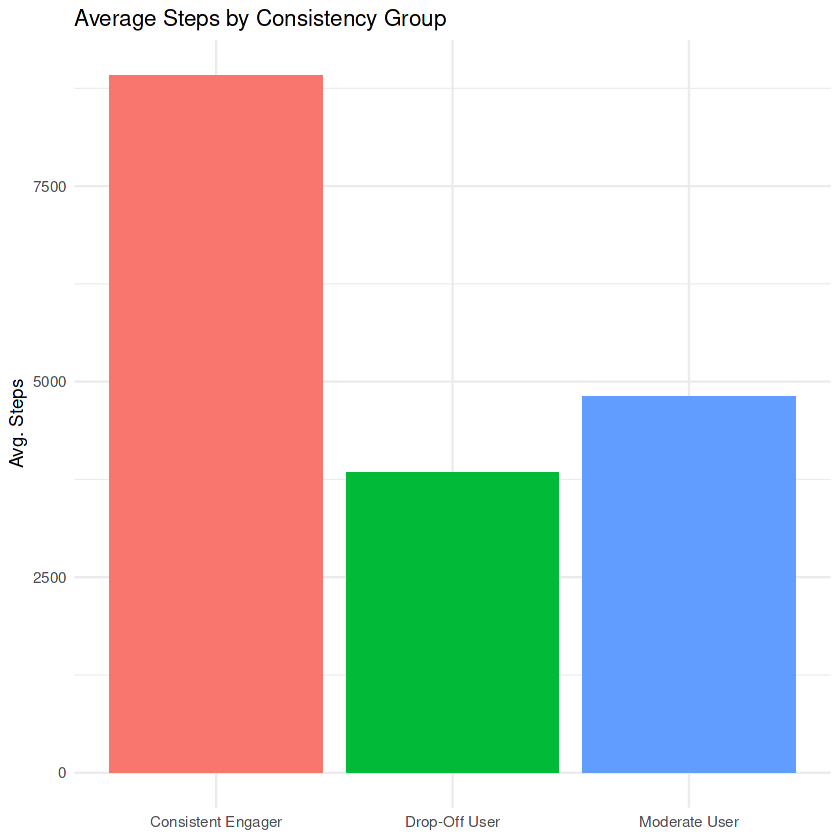

In [6]:
#Chart 1: Steps by Consistency Group
ggplot(group_summary, aes(x = consistency_group, y = avg_steps, fill = consistency_group)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Steps by Consistency Group", y = "Avg. Steps", x = NULL) +
  theme_minimal() +
  theme(legend.position = "none")

#### Sedentary Time by Consistency Group
Users with lower consistency in device usage show significantly higher sedentary time, suggesting a potential behavioral feedback loop: disengaged users are more sedentary, which may further reduce motivation to track activity


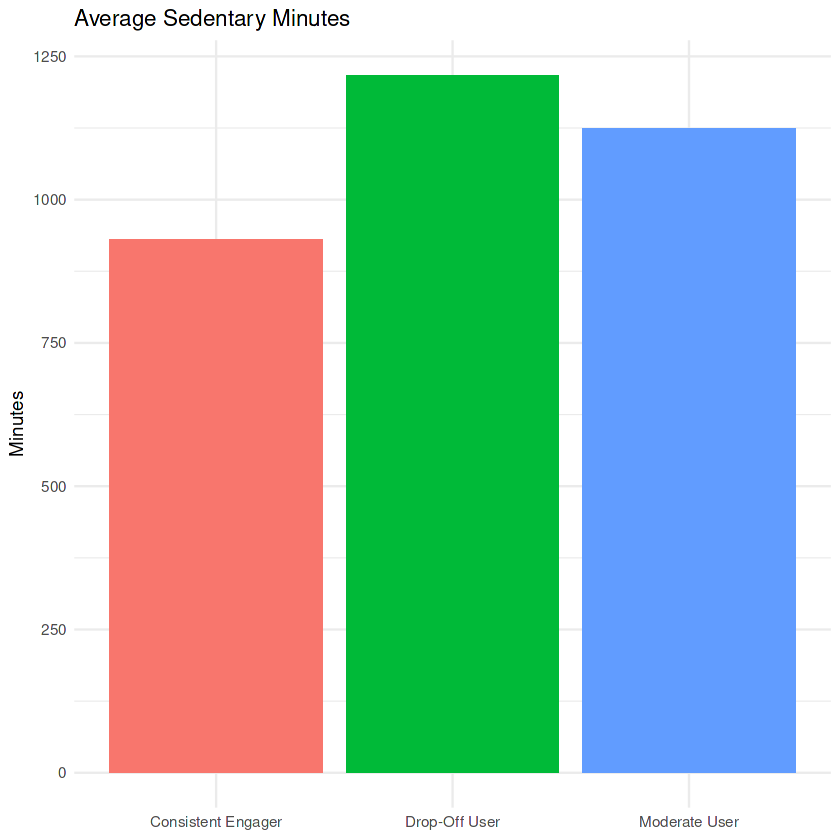

In [7]:
#Chart 2: Sedentary Time by Group
ggplot(group_summary, aes(x = consistency_group, y = avg_sedentary, fill = consistency_group)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Sedentary Minutes", y = "Minutes", x = NULL) +
  theme_minimal() +
  theme(legend.position = "none")

#### Sleep vs Steps 
A boxplot showing the relationship between sleep duration and physical activity. Users with higher sleep levels generally show higher median steps, suggesting a positive association between rest and movement — reinforcing Bellabeat’s wellness positioning.

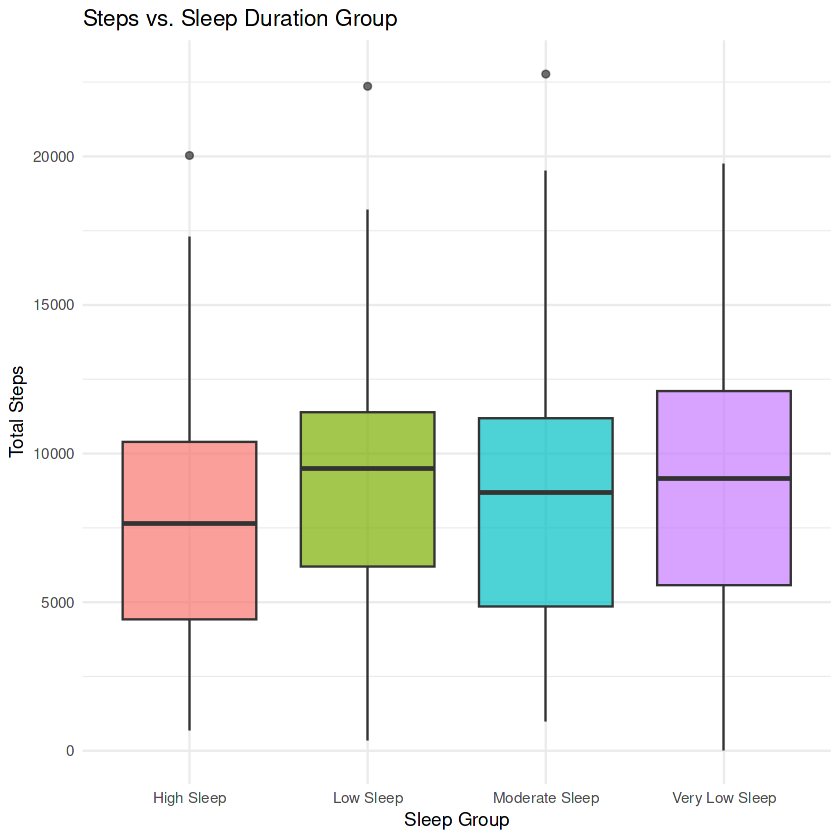

In [8]:
#Chart 3 : Sleep vs Steps
# Create sleep quartiles
sleep_steps_plot <- combined %>%
  filter(!is.na(total_minutes_asleep), !is.na(total_steps)) %>%
  mutate(sleep_group = ntile(total_minutes_asleep, 4)) %>%
  mutate(sleep_group = case_when(
    sleep_group == 1 ~ "Very Low Sleep",
    sleep_group == 2 ~ "Low Sleep",
    sleep_group == 3 ~ "Moderate Sleep",
    sleep_group == 4 ~ "High Sleep"
  ))

# Boxplot: Steps by Sleep Group
ggplot(sleep_steps_plot, aes(x = sleep_group, y = total_steps, fill = sleep_group)) +
  geom_boxplot(alpha = 0.7) +
  labs(title = "Steps vs. Sleep Duration Group",
       x = "Sleep Group",
       y = "Total Steps") +
  theme_minimal() +
  theme(legend.position = "none")




#### Daily Active Users Over Time (Retention Curve)
This line graph illustrates the number of active users each day over the 31-day tracking period. While engagement remains high in the first two weeks, a steady decline begins after Day 15, with a ~34% drop in active users by the end of the month. This drop-off trend provides a key opportunity for early re-engagement strategies within the Bellabeat app.


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


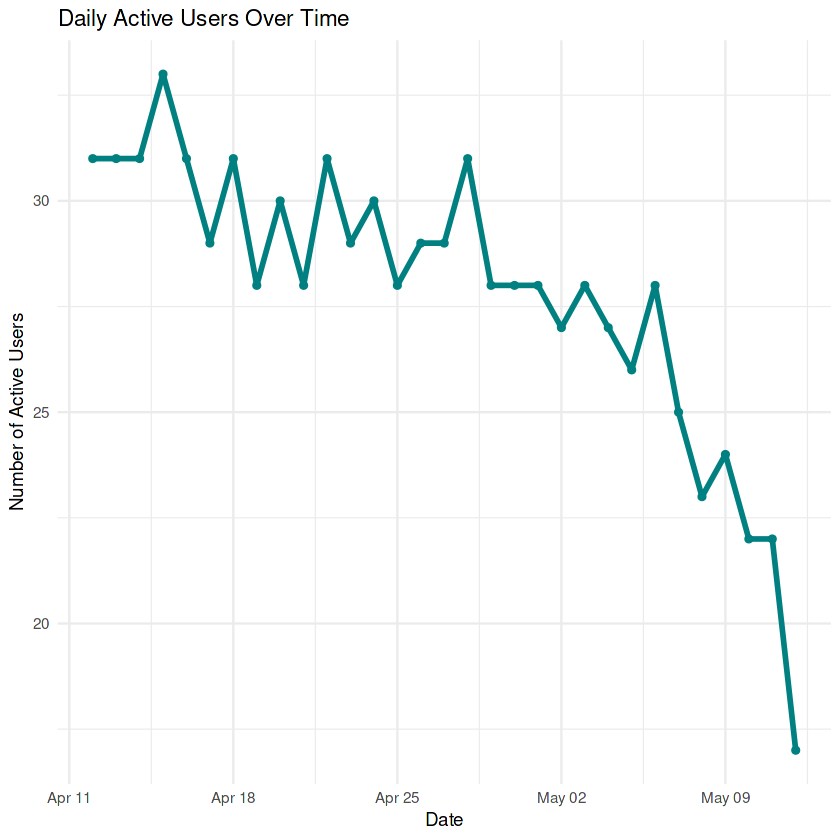

In [9]:
#Chart 4: Drop-off Pattern -"User retention over time"
#Creating daily engagement table
daily_retention <- combined %>%
  filter(!is.na(active_day)) %>%
  group_by(date) %>%
  summarise(active_users = sum(active_day))

#Plotting the retention trend
ggplot(daily_retention, aes(x = date, y = active_users)) +
  geom_line(color = "#008080", size = 1.2) +
  geom_point(color = "#008080") +
  labs(title = "Daily Active Users Over Time",
       x = "Date",
       y = "Number of Active Users") +
  theme_minimal()


## ACT PHASE -Strategic Recommendations
Based on the behavioral insights uncovered through this analysis, three key strategic recommendations are proposed to help Bellabeat enhance engagement, retention, and user satisfaction with the Leaf tracker and companion app.

* **Momentum-Based Progress Design**
**Insight**: Consistent users walk significantly more and are less sedentary, suggesting strong behavior momentum.
**Recommendation**: Move beyond traditional streaks and introduce a **"Wellness Momentum" tracker** in the app. This feature can visualize upward trends over time (e.g., “You've increased your activity 3 out of the last 4 weeks”), promoting sustainable engagement even if a day is missed.

* **Passive Engagement Experience for Leaf Users**
**Insight:** The Leaf is a non-screen wearable, meaning users don’t interact with it like a smartwatch.
**Recommendation:** Shift engagement strategies toward **weekly summaries** and **gentle, reflective messaging** rather than real-time alerts. For example, the app can provide calming “end-of-week recaps” and invite users to check their sleep/activity trends in a non-intrusive way.

* **Emotionally Intelligent Re-engagement Strategy**
**Insight:** Drop-off begins sharply around Day 15, with some users never engaging in sleep tracking at all.
**Recommendation:** Treat disengagement as a signal of **psychological friction**, not just inactivity. Bellabeat can implement re-engagement features with messages like “It’s okay to take a break,” or “Want to start fresh this week?” to support long-term wellness without guilt or pressure.

**Summary:**
These recommendations emphasize **compassionate, passive, and progress-oriented engagement**, aligning with Bellabeat’s brand values and the Leaf’s unique product design. By focusing on user psychology and behavior consistency, Bellabeat can better retain users and support lasting wellness habits.
